In [1]:
from IPython.display import Image as ImageDisp
from PIL import Image
import sys
import imutils
import pytesseract
from pathlib import Path
import cv2
import numpy as np
from pytesseract import TesseractError
from matplotlib import pyplot as plt

In [2]:
def imshow(img):
    plt.figure(figsize = (15,15))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation='nearest', aspect='auto')

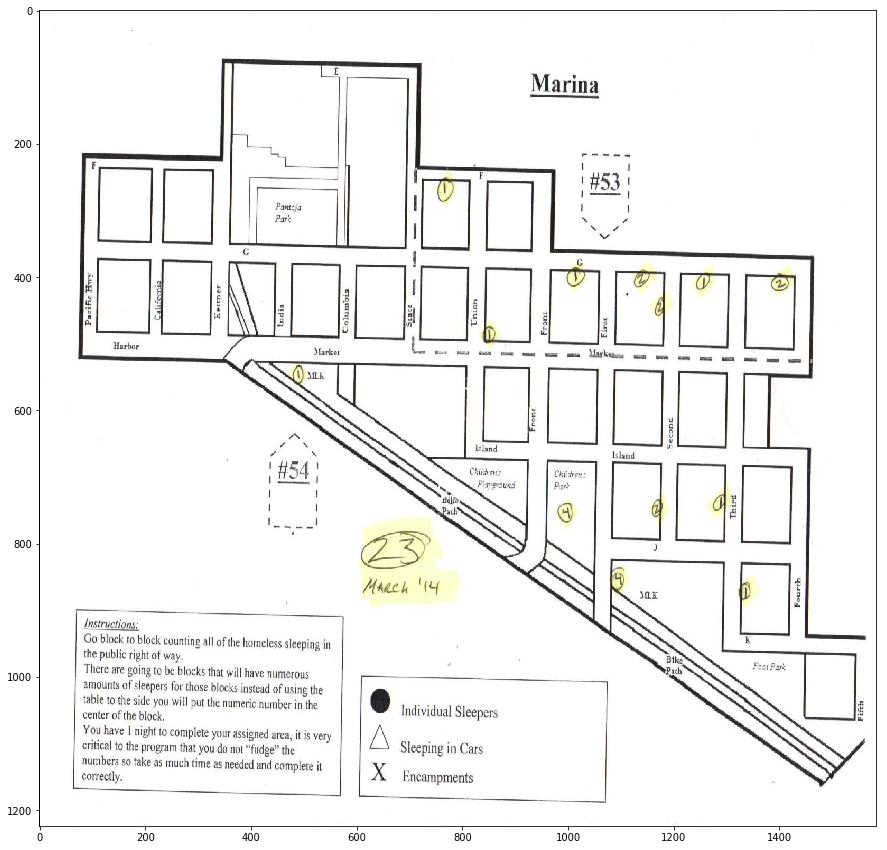

In [9]:
f = '/Users/eric/proj/virt-proj/data-project/downtown-partnership/images/2014/03/201403-004.png'
img = cv2.imread(f)

kernel = np.ones((5,5),np.uint8)

img = imutils.rotate_bound(img, angle=90)

imshow(img)

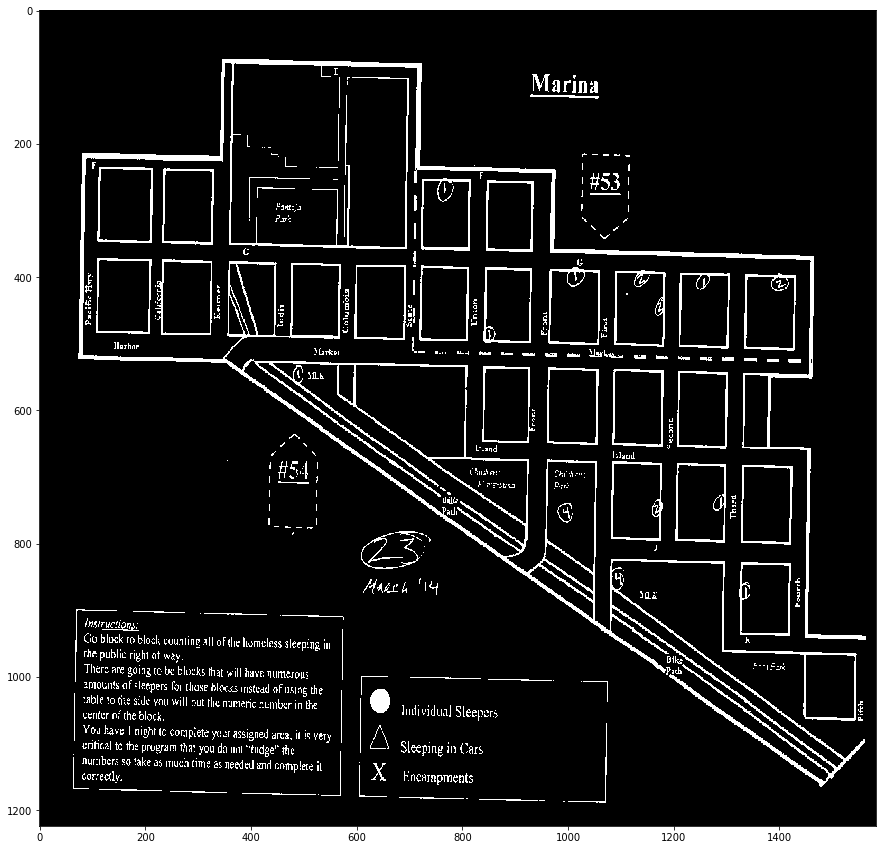

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
 
# threshold the image, setting all foreground pixels to
# 255 and all background pixels to 0
thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

imshow(thresh)



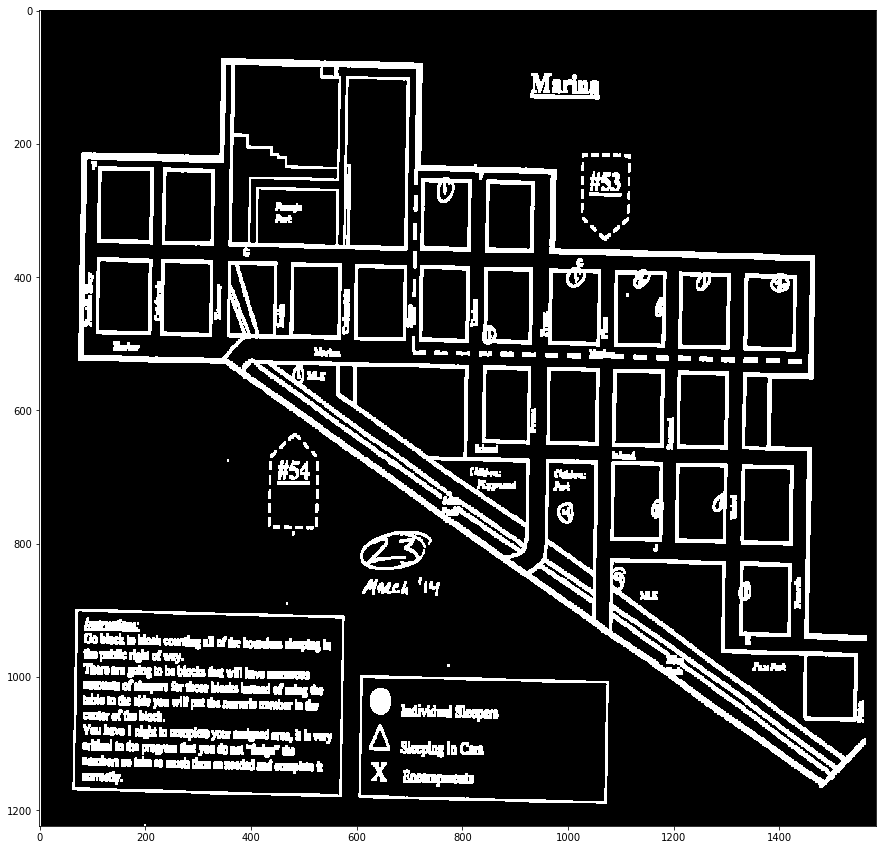

In [15]:

# threshold the image, setting all foreground pixels to
# 255 and all background pixels to 0
#gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

gray = cv2.dilate(thresh,kernel,iterations = 1)

# Apply edge detection method on the image 
edges = cv2.Canny(gray,50,150,apertureSize = 3) 


    
imshow(gray) 

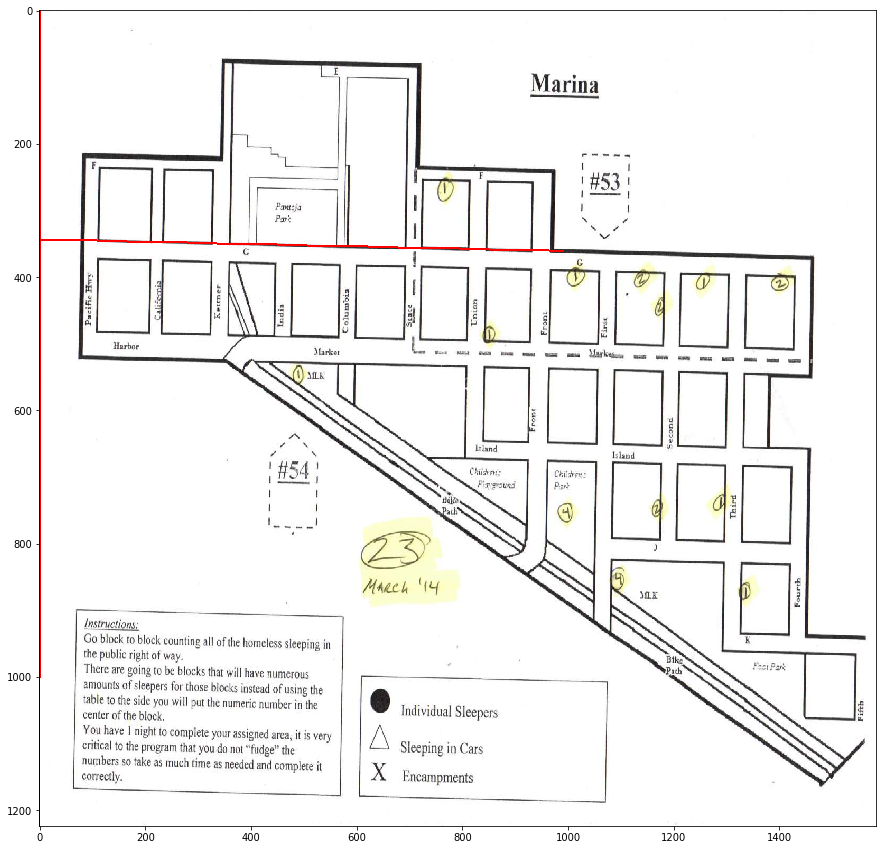

In [18]:

# This returns an array of r and theta values 
lines = cv2.HoughLines(thresh,1,np.pi/180, 200) 

# The below for loop runs till r and theta values  
# are in the range of the 2d array 
for r,theta in lines[0]: 
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
    # x0 stores the value rcos(theta) 
    x0 = a*r 
    # y0 stores the value rsin(theta) 
    y0 = b*r 
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2) 

imshow(img)
